In [1]:
import json
import os
import pandas as pd
import numpy as np
from scipy.stats import spearmanr, kendalltau

### Extracting scores

In [25]:
def process_gpt_files(directory):
    df_list = []
    for filename in os.listdir(directory):
        if filename.endswith('.json'):
            file_path = os.path.join(directory, filename)
            df_name = os.path.splitext(filename)[0]  # Extracting file name without extension
            with open(file_path, 'r') as file:
                data = json.load(file)
                df = pd.DataFrame(data)
                df = df[['scores', 'all_responses']]
                df.loc[:, 'first_score'] = df['all_responses'].apply(lambda x: x[0])
            globals()[df_name] = df  # Assigning DataFrame to dynamically named variable
            print(df_name)
            df_list.append(df)
    return df_list

directory = 'results/for_analysis/gpt'
list_gpt = process_gpt_files(directory)

gpt35_coh
gpt4_flu
gpt4o_rel
gpt4_coh
gpt35_flu
gpt35_con
gpt4_con
gpt4_rel
gpt4o_flu
gpt35_coh_just
gpt4o_coh
gpt35_rel
gpt35_con_just
gpt35_flu_just
gpt35_rel_just
gpt4o_con


In [3]:
def process_claude_files(directory):
    for filename in os.listdir(directory):
        if filename.endswith('.json'):
            file_path = os.path.join(directory, filename)
            df_name = os.path.splitext(filename)[0]  # Extracting file name without extension
            with open(file_path, 'r') as file:
                data = json.load(file)
                df = pd.DataFrame(data)
                df.loc[:, 'scores'] = df['instance'].apply(lambda x: x['scores'])
                df = df[['scores', 'all_responses']]
                df.loc[:, 'first_score'] = df['all_responses'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)
            globals()[df_name] = df  # Assigning DataFrame to dynamically named variable
            print(df_name)

directory = 'results/for_analysis/claude'
process_claude_files(directory)

sonnet_rel
haiku_coh
opus_rel
haiku_flu
haiku_con
haiku_con_just
haiku_rel_just
haiku_flu_just
sonnet_flu
opus_coh
opus_flu
sonnet_coh
haiku_coh_just
haiku_rel
opus_con
sonnet_con


In [4]:
def Preping_df(df, metric):  
    df.loc[: ,'first_score'] = df['first_score'].apply(lambda x: int(x[-1]) if x is not None and x[-1].isdigit() else None)
    df.loc[:, 'prob_score'] = df['all_responses'].apply(
        lambda x: np.mean([int(i[-1]) for i in x if i and i[-1].isdigit()]))
    df.loc[:, metric] = df['scores'].apply(lambda x: x[metric] )
    print(df.isna().sum())
    df.dropna(inplace=True)

In [5]:
def Spearman_calculation(df, metric): 
    correlation, p_value = spearmanr(df['first_score'], df[metric])
    print(f"Spearman Correlation Coefficient for {metric} - one score : {correlation:.3f}")
    correlation, p_value = spearmanr(df['prob_score'], df[metric])
    print(f"Spearman Correlation Coefficient for {metric} - probability score : {correlation:.3f}")

In [6]:
Preping_df(gpt35_coh, 'coherence')
Preping_df(gpt35_flu, 'fluency')
Preping_df(gpt35_con, 'consistency')
Preping_df(gpt35_rel, 'relevance')

scores           0
all_responses    0
first_score      2
prob_score       0
coherence        0
dtype: int64
scores           0
all_responses    0
first_score      1
prob_score       0
fluency          0
dtype: int64
scores           0
all_responses    0
first_score      3
prob_score       0
consistency      0
dtype: int64
scores           0
all_responses    0
first_score      2
prob_score       0
relevance        0
dtype: int64


In [7]:
Preping_df(gpt35_coh_just, 'coherence')
Preping_df(gpt35_flu_just, 'fluency')
Preping_df(gpt35_con_just, 'consistency')
Preping_df(gpt35_rel_just, 'relevance')

scores            0
all_responses     0
first_score      39
prob_score        0
coherence         0
dtype: int64
scores            0
all_responses     0
first_score      38
prob_score        0
fluency           0
dtype: int64
scores            0
all_responses     0
first_score      60
prob_score        0
consistency       0
dtype: int64
scores            0
all_responses     0
first_score      16
prob_score        0
relevance         0
dtype: int64


In [8]:
Preping_df(haiku_coh, 'coherence')
Preping_df(haiku_flu, 'fluency')
Preping_df(haiku_con, 'consistency')
Preping_df(haiku_rel, 'relevance')

scores           0
all_responses    0
first_score      0
prob_score       0
coherence        0
dtype: int64
scores           0
all_responses    0
first_score      0
prob_score       0
fluency          0
dtype: int64
scores           0
all_responses    0
first_score      0
prob_score       0
consistency      0
dtype: int64
scores           0
all_responses    0
first_score      0
prob_score       0
relevance        0
dtype: int64


In [9]:
Preping_df(haiku_coh_just, 'coherence')
Preping_df(haiku_flu_just, 'fluency')
Preping_df(haiku_con_just, 'consistency')
Preping_df(haiku_rel_just, 'relevance')

scores           0
all_responses    0
first_score      1
prob_score       0
coherence        0
dtype: int64
scores            0
all_responses     0
first_score      60
prob_score        0
fluency           0
dtype: int64
scores            0
all_responses     0
first_score      33
prob_score       26
consistency       0
dtype: int64
scores            0
all_responses     0
first_score      11
prob_score        5
relevance         0
dtype: int64


/opt/homebrew/anaconda3/envs/LLM_research/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/anaconda3/envs/LLM_research/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/opt/homebrew/anaconda3/envs/LLM_research/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/anaconda3/envs/LLM_research/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [10]:
Preping_df(gpt4_coh, 'coherence')
Preping_df(gpt4_flu, 'fluency')
Preping_df(gpt4_con, 'consistency')
Preping_df(gpt4_rel, 'relevance')

scores           0
all_responses    0
first_score      1
prob_score       0
coherence        0
dtype: int64
scores           0
all_responses    0
first_score      0
prob_score       0
fluency          0
dtype: int64
scores           0
all_responses    0
first_score      0
prob_score       0
consistency      0
dtype: int64
scores           0
all_responses    0
first_score      0
prob_score       0
relevance        0
dtype: int64


In [11]:
Preping_df(sonnet_coh, 'coherence')
Preping_df(sonnet_flu, 'fluency')
Preping_df(sonnet_con, 'consistency')
Preping_df(sonnet_rel, 'relevance')

scores           0
all_responses    0
first_score      1
prob_score       0
coherence        0
dtype: int64
scores           0
all_responses    0
first_score      0
prob_score       0
fluency          0
dtype: int64
scores           0
all_responses    0
first_score      2
prob_score       0
consistency      0
dtype: int64
scores           0
all_responses    0
first_score      0
prob_score       0
relevance        0
dtype: int64


In [12]:
Preping_df(opus_coh, 'coherence')
Preping_df(opus_flu, 'fluency')
Preping_df(opus_con, 'consistency')
Preping_df(opus_rel, 'relevance')

scores           0
all_responses    0
first_score      2
prob_score       2
coherence        0
dtype: int64


/opt/homebrew/anaconda3/envs/LLM_research/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/anaconda3/envs/LLM_research/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


scores           0
all_responses    0
first_score      0
prob_score       0
fluency          0
dtype: int64
scores           0
all_responses    0
first_score      0
prob_score       0
consistency      0
dtype: int64
scores           0
all_responses    0
first_score      2
prob_score       2
relevance        0
dtype: int64


/opt/homebrew/anaconda3/envs/LLM_research/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/anaconda3/envs/LLM_research/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [26]:
Preping_df(gpt4o_coh, 'coherence')
Preping_df(gpt4o_flu, 'fluency')
Preping_df(gpt4o_con, 'consistency')
Preping_df(gpt4o_rel, 'relevance')

scores           0
all_responses    0
first_score      3
prob_score       0
coherence        0
dtype: int64
scores           0
all_responses    0
first_score      0
prob_score       0
fluency          0
dtype: int64
scores             0
all_responses      0
first_score      216
prob_score         5
consistency        0
dtype: int64
scores            0
all_responses     0
first_score      14
prob_score        0
relevance         0
dtype: int64


/opt/homebrew/anaconda3/envs/LLM_research/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/anaconda3/envs/LLM_research/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


### Spearman

GPT

In [14]:
Spearman_calculation(gpt35_coh, 'coherence')
Spearman_calculation(gpt35_flu, 'fluency')
Spearman_calculation(gpt35_con, 'consistency')
Spearman_calculation(gpt35_rel, 'relevance')

Spearman Correlation Coefficient for coherence - one score : 0.398
Spearman Correlation Coefficient for coherence - probability score : 0.555
Spearman Correlation Coefficient for fluency - one score : 0.266
Spearman Correlation Coefficient for fluency - probability score : 0.342
Spearman Correlation Coefficient for consistency - one score : 0.399
Spearman Correlation Coefficient for consistency - probability score : 0.436
Spearman Correlation Coefficient for relevance - one score : 0.421
Spearman Correlation Coefficient for relevance - probability score : 0.508


GPT with justification

In [15]:
Spearman_calculation(gpt35_coh_just, 'coherence')
Spearman_calculation(gpt35_flu_just, 'fluency')
Spearman_calculation(gpt35_con_just, 'consistency')
Spearman_calculation(gpt35_rel_just, 'relevance')

Spearman Correlation Coefficient for coherence - one score : 0.367
Spearman Correlation Coefficient for coherence - probability score : 0.534
Spearman Correlation Coefficient for fluency - one score : 0.195
Spearman Correlation Coefficient for fluency - probability score : 0.320
Spearman Correlation Coefficient for consistency - one score : 0.309
Spearman Correlation Coefficient for consistency - probability score : 0.377
Spearman Correlation Coefficient for relevance - one score : 0.263
Spearman Correlation Coefficient for relevance - probability score : 0.453


Haiku

In [16]:
Spearman_calculation(haiku_coh, 'coherence')
Spearman_calculation(haiku_flu, 'fluency')
Spearman_calculation(haiku_con, 'consistency')
Spearman_calculation(haiku_rel, 'relevance')

Spearman Correlation Coefficient for coherence - one score : 0.396
Spearman Correlation Coefficient for coherence - probability score : 0.487
Spearman Correlation Coefficient for fluency - one score : 0.298
Spearman Correlation Coefficient for fluency - probability score : 0.393
Spearman Correlation Coefficient for consistency - one score : 0.421
Spearman Correlation Coefficient for consistency - probability score : 0.448
Spearman Correlation Coefficient for relevance - one score : 0.382
Spearman Correlation Coefficient for relevance - probability score : 0.516


Haiku with justification

In [17]:
Spearman_calculation(haiku_coh_just, 'coherence')
Spearman_calculation(haiku_flu_just, 'fluency')
Spearman_calculation(haiku_con_just, 'consistency')
Spearman_calculation(haiku_rel_just, 'relevance')

Spearman Correlation Coefficient for coherence - one score : 0.430
Spearman Correlation Coefficient for coherence - probability score : 0.547
Spearman Correlation Coefficient for fluency - one score : 0.312
Spearman Correlation Coefficient for fluency - probability score : 0.385
Spearman Correlation Coefficient for consistency - one score : 0.417
Spearman Correlation Coefficient for consistency - probability score : 0.431
Spearman Correlation Coefficient for relevance - one score : 0.420
Spearman Correlation Coefficient for relevance - probability score : 0.519


GPT4 

In [18]:
Spearman_calculation(gpt4_coh, 'coherence')
Spearman_calculation(gpt4_flu, 'fluency')
Spearman_calculation(gpt4_con, 'consistency')
Spearman_calculation(gpt4_rel, 'relevance')

Spearman Correlation Coefficient for coherence - one score : 0.521
Spearman Correlation Coefficient for coherence - probability score : 0.544
Spearman Correlation Coefficient for fluency - one score : 0.385
Spearman Correlation Coefficient for fluency - probability score : 0.380
Spearman Correlation Coefficient for consistency - one score : 0.643
Spearman Correlation Coefficient for consistency - probability score : 0.612
Spearman Correlation Coefficient for relevance - one score : 0.510
Spearman Correlation Coefficient for relevance - probability score : 0.534


Sonnet

In [19]:
Spearman_calculation(sonnet_coh, 'coherence')
Spearman_calculation(sonnet_flu, 'fluency')
Spearman_calculation(sonnet_con, 'consistency')
Spearman_calculation(sonnet_rel, 'relevance')

Spearman Correlation Coefficient for coherence - one score : 0.436
Spearman Correlation Coefficient for coherence - probability score : 0.502
Spearman Correlation Coefficient for fluency - one score : 0.323
Spearman Correlation Coefficient for fluency - probability score : 0.370
Spearman Correlation Coefficient for consistency - one score : 0.653
Spearman Correlation Coefficient for consistency - probability score : 0.628
Spearman Correlation Coefficient for relevance - one score : 0.476
Spearman Correlation Coefficient for relevance - probability score : 0.542


Opus

In [20]:
Spearman_calculation(opus_coh, 'coherence')
Spearman_calculation(opus_flu, 'fluency')
Spearman_calculation(opus_con, 'consistency')
Spearman_calculation(opus_rel, 'relevance')

Spearman Correlation Coefficient for coherence - one score : 0.516
Spearman Correlation Coefficient for coherence - probability score : 0.516
Spearman Correlation Coefficient for fluency - one score : 0.456
Spearman Correlation Coefficient for fluency - probability score : 0.456
Spearman Correlation Coefficient for consistency - one score : 0.612
Spearman Correlation Coefficient for consistency - probability score : 0.612
Spearman Correlation Coefficient for relevance - one score : 0.530
Spearman Correlation Coefficient for relevance - probability score : 0.530


GPT4o

In [27]:
Spearman_calculation(gpt4o_coh, 'coherence')
Spearman_calculation(gpt4o_flu, 'fluency')
Spearman_calculation(gpt4o_con, 'consistency')
Spearman_calculation(gpt4o_rel, 'relevance')

Spearman Correlation Coefficient for coherence - one score : 0.449


Spearman Correlation Coefficient for coherence - probability score : 0.539
Spearman Correlation Coefficient for fluency - one score : 0.322
Spearman Correlation Coefficient for fluency - probability score : 0.406
Spearman Correlation Coefficient for consistency - one score : 0.523
Spearman Correlation Coefficient for consistency - probability score : 0.521
Spearman Correlation Coefficient for relevance - one score : 0.540
Spearman Correlation Coefficient for relevance - probability score : 0.591


### Prompting workshop

In [31]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [8]:
def process_gpt_files(directory):
    df_list = []
    for filename in os.listdir(directory):
        if filename.endswith('.json'):
            file_path = os.path.join(directory, filename)
            df_name = os.path.splitext(filename)[0]  # Extracting file name without extension
            with open(file_path, 'r') as file:
                data = json.load(file)
                df = pd.DataFrame(data)
                df = df[['scores', 'all_responses']]
                df.loc[:, 'first_score'] = df['all_responses'].apply(lambda x: x[0])
            globals()[df_name] = df  # Assigning DataFrame to dynamically named variable
            print(df_name)
            df_list.append(df)
    return df_list

directory = 'results/prompting'
list_gpt = process_gpt_files(directory)

gpt4o_flu_1


In [9]:
Preping_df(gpt4o_flu_1, 'fluency')
Spearman_calculation(gpt4o_flu_1, 'fluency')

scores           0
all_responses    0
first_score      1
prob_score       0
fluency          0
dtype: int64
Spearman Correlation Coefficient for fluency - one score : 0.280
Spearman Correlation Coefficient for fluency - probability score : 0.351


In [16]:
gpt4o_flu_1['fluency'] = gpt4o_flu_1['scores'].apply(lambda x: x['fluency'])

In [20]:
gpt4o_flu_1['fluency'] = gpt4o_flu_1['fluency'].astype(int)

In [21]:
gpt4o_flu_1['fluency']

0      3
1      5
2      5
3      5
4      3
      ..
795    5
796    4
797    5
798    4
799    3
Name: fluency, Length: 799, dtype: int64

In [22]:
gpt4o_flu_1['fluency'].mean()

4.51314142678348

In [24]:
gpt4o_flu_1['prob_score'].mean()

3.096245306633292

In [28]:
gpt4o_flu['prob_score'].mean()

3.029473684210526

(array([ 14.,   0.,  30.,   0.,   0.,  45.,   0., 153.,   0., 557.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

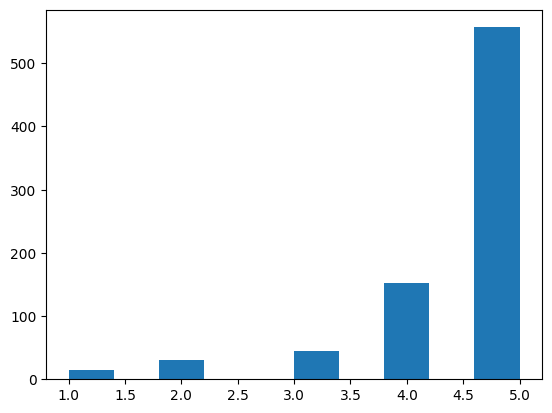

In [36]:
plt.hist(gpt4o_flu_1['fluency'])

(array([ 22.,  34., 143., 273., 357., 352., 182.,  87.,  36., 114.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

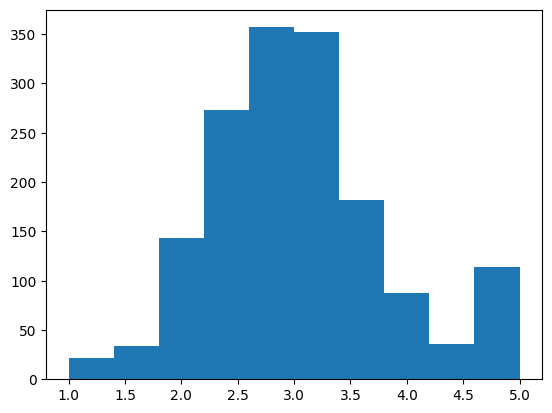

In [37]:
plt.hist(gpt4o_flu['prob_score'])

(array([  5.,  13.,  55., 131., 207., 170.,  89.,  34.,  18.,  77.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

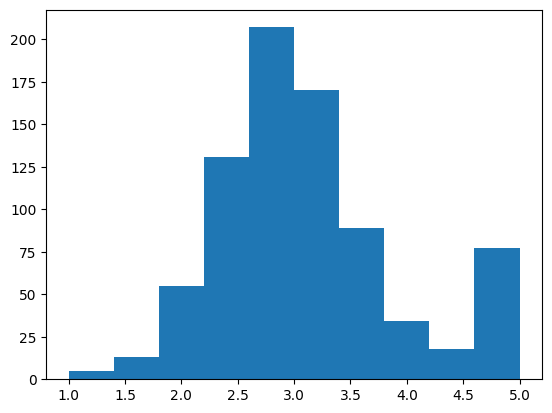

In [38]:
plt.hist(gpt4o_flu_1['prob_score'])